In [192]:
%matplotlib inline

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import random


# Monte Carlo Simulation and using it to estimate $ \pi $
## Math Concepts for Developers Final Project
### By Aleksandar Hristov Ivanov (Maimunar)

### Abstract

Have you ever wondered "What did the guy who invented the hydrogen bomb do in his free time?"? Me neither. Nevertheless, what Stanislaw Ulam (A Polish Matematician responsible for the above mentioned invention) did was to invent the so called Monte Carlo Method, which is the main topic of this project. Before we get to that, you're going to be able to find out what a simulation really is and where it's useful - you'll also be able to find out about the various kinds of simulations and the usefulness of statistics with simulation. Before we go into the automatized simulation of the functions involving the Monte Carlo Method, we're going to go through a manual simulation of random processes, just to be on the same page when it comes to real simulations. The real fun starts afterwards - the Monte Carlo is thoroughly explained, followed by its use in number integration. After that comes the special part of this project - using what we know in a real-life scenario in order to estimate pi. There is a lot of further information in form of references to various sites and youtube video, if something catches your interest, feel free to find out more detailed information about the topic of choice there as well. I hope you find this a good read!

### What is a simulation?

According to [Wikipedia](https://en.wikipedia.org/wiki/Simulation), "a **simulation** is an approximate imitation of the operation of a process or system." For it to be done properly, a model should be developed beforehand - one that describes the simulated subject and represents its key characteristics, such as behaviour, functions and other properties. This model represents the system itself, while the simulation represents its operations. Breaking that down, a simulation is a way for someone to estimate the results of a specific action without being able to see it, and the above mentioned model is built from the details that he has - obviously a more detailed model would give superior and more exact and trustworthy results, which is where statistics come in, but more on that later.

Simulation is used for performance optimization, safety engineering (where a result has a specific risk tied to it, you would prefer to simulate the action instead of risking anything), testing, training (a lot of machine learning algorithms use simulation, I hope I can give more details about that in a bit less than a year :D ) and video games (strategy games, which may be viewed as simulations of old games such as [Go](https://en.wikipedia.org/wiki/History_of_Go) or [Kriegsspiel](https://en.wikipedia.org/wiki/Kriegsspiel). It has its use in scientific modelling of natural or human systems in order to find out more about their functioning, as well as is economics. Simulation is the main way of handling a situation that cannot be accessed by us yet, which may be due to it being dangerous, it existing only in the virtual space or it being a couple billion of light years away from us.

By itself, a simulation does not hide any issues regarding its use, what could go south easily that involves the simulation is due to improper use of the model - it may be too simple, approximate, it may not show key characteristics that are relevant for the simulation (An economics model that does not include the altering of a specific currency's exact value for example), and other. This is why a lot of procedures and protocols for [model vertification and validation](https://en.wikipedia.org/wiki/Verification_and_validation_of_computer_simulation_models) are being studied.

#### Simulation in Computer science

Alan Turing (English matematician and computer scientist 1912-1954) used the term "simulation" to refer to what happens when a computer runs a program. A more interesting application is using a computer to simulate another computer, or [to emulate it](https://en.wikipedia.org/wiki/Emulator). That is used normally to run a specific program that requires an inconvenient type of computer - one that is yet to be build, or one that is rendered obsolete by now.

Simulation is also used extensively in education due to the humans's proficiency bonus to adapting to them (I'd say atleast +5 to the d20 roll, but that might be a bit too overpowered in the early levels). A training simulation is divided into three categories:
* **live** simulation - where actual players use genuine systems in a real environment
* **virtual** simulation - where actual players use simulated systems in a synthetic environment
* **constructive** simulation - where simulated players use simulated systems in a synthetic environment

Allright - it is not so easy to distinguish all of those from eachother - maybe an example here would help. A military training event that uses real equipment, but not live enemies is considered a live event. The lack of real enemies keeps it in the simulations group. A virtual simulation involves the so-called [Human-in-the-loop](https://en.wikipedia.org/wiki/Human-in-the-loop) infection - a human takes a central role into the functionality of the simulator. An example of constructive simulation is when a user inputs data for a simulated soldier to move to a specific place and atack the enemy in a military simulation - the result will include the speed of movement, the effect of the attack and the battle damage that may occur.

### How are statistics useful in a simulation?

Statistics come in to play while designing a model for the simulation - they provide a big ammount of data which may be used to increase accuracy or also simulate randomness (more on that later). The purpose of this usually falls into two categories - **Can My Method Handle X?** where we simulate a series of many random populations when you know the "right" answer - you simulate a little bit of fluctuation in the numbers that you study, you add in a bit of random noise to the function to see if it works out properly.

The next category is the **What happens if it does handle X?** category - firstly, when you're getting unexpected results, using a statistic might help you find out the reason. Statistics help with processes that use nonlinear inputs. Some good examples I found [here](https://stats.stackexchange.com/questions/22293/explanation-of-statistical-simulation) are when a manufacturing firm thinks whether its cost effective to add an extra production line, or a call centre that figures out the best way to route calls around operators to reduce wait time and many other.

#### How can we simulate unknown, random processes?

A very good video describing the topic is [this one](https://www.youtube.com/watch?v=08UVHYESkeQ) . In order to explain this, i'm going to go through the process described there.

Lets look at this task "Inside of your favorite cereal box is a figurine of a famous sports athlete. The company claims that 11% of boxes contain Tiger Woods, 27% - Serena Williams, and 62% - Tom Brady. How many boxes does it take to get all 3 figurines?"

Now, obviously there are percentages involved so we can do the maths easily. Unfortunately that's not what we're here for, since in order to see those exact numbers, someone must open way too many cereal boxes for him to eat - we're only here for the 3 figurines. We're going to do this by doing a (pretty manual) simulation - we're going to use two digit numbers in order to describe the figurine in the box. The numbers will go from 00 to 99 - 00-10 Will be Tiger Woods, 11-37 will be Serena Williams and 38-99 - Tiger Woods. For this im going to use a pre-generated random list. Once i get the 3 figurines, i will write down the ammount of boxes it took me to get all 3 figurines. The code is there just to make things look prettier.

In [194]:
"00-10 = Tiger Woods    11-37 = Serena Williams    38-99 = Tiger Woods"

'00-10 = Tiger Woods    11-37 = Serena Williams    38-99 = Tiger Woods'

In [195]:
["0652 1273 5777 6362 8609 0797 2599 2780 4969 3453 1644 8880 3816 9089 1190 2474 2629 9567 8827 4716 8816 6610 0170 0781 9471 0173 5888 0765 0949 5575 4596 7628 1322 6307 2032 7125 5514 2046 2368 6806 9381 8193 7861 2878 7358 6994 3287 7644 9766 6329"]

['0652 1273 5777 6362 8609 0797 2599 2780 4969 3453 1644 8880 3816 9089 1190 2474 2629 9567 8827 4716 8816 6610 0170 0781 9471 0173 5888 0765 0949 5575 4596 7628 1322 6307 2032 7125 5514 2046 2368 6806 9381 8193 7861 2878 7358 6994 3287 7644 9766 6329']

Lets start by manually looking at the numbers in pairs - this could be simulated, but I think the learning aspect of doing it ourselves is important here (I am totally not feeling way too lazy to do it properly ofcourse). Now would you look at that! We got the 3 figurines straight out of the first 3 boxes (I did not set this up I promise!) This deffinitely does not relate to the percentages we got from the company, but it doesnt matter - we're looking at real results, rather than percentages. I am going to write down the next few results as well, just for the sake of the experiment.

First 3 Figurines - 3 Boxes

Second 3 Figurines - 10 Boxes

Third 3 Figurines - 31 Boxes (I guess that's our luck gone from the first set of boxes)

Fourth 3 Figurines - 20 Boxes

Fifth 3 Figurines - 4 Boxes (Hearthstone's inkeeper just shouted "Woah, golden legendary" in my head)

Yeah, well I'm done, got bored from that, and I guess I have to leave when I am at my best.

### What is a Monte Carlo simulation? ( or a Monte Carlo method)

Okay, let's do this the old fashioned way, first we'll go by Wikipedia's definition, and then we'll expand on that. The Monte Carlo methods are a variety of computational algorithms that rely on repeated random sampling to obtain numerical results. It's concept is to use the randomness on problems that are most likely [deterministic](https://en.wikipedia.org/wiki/Deterministic_system) in principle. It finds its use in physical and mathematical problems and it's most useful when it is too difficult to use any other approach. Normally we use the Monte Carlo method in these 3 cases - [optimization](https://en.wikipedia.org/wiki/Mathematical_optimization) (just like other simulations), [numerical integration](https://en.wikipedia.org/wiki/Numerical_integration) (more on that later) and generating draws from a [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution)(something that shows the probability of random events(A coin toss would have a 0.5 for x = heads and a 0.5 for x = tails chance(assuming that it's a fair coin toss ofcourse(there are too many brackets in here)))).

If there is one link that you'll click in this project, it deffinitely should be [this one](https://www.youtube.com/watch?v=OgO1gpXSUzU&t=1806s) - this is MIT's OpenCourse lecture on the Monte Carlo Simulation - the lecturer goes through the history and explains everything in great detail. You can understand Gambler's Fallacy, Regression to the Mean

Naturally, the larger varience you have in your result, the larger sample size you need - if you just saw 100 coin flips result in heads, you'd feel confident that the 101st would be also heads, if it was 52 heads and 48 tails, you'd not feel as confident to say that the next one has a 52% chance of being heads (or that the next 100 tosses would again result in 52 heads and 48 tails).

Essentially, after enough tries on let's say a roulette, you would be able to say "The probability of simulating a single pocket for 1 Million spins is X %, with a margin of error of +/- Y % with Z % confidence". 

X will equal the mean

Y will be found through the standard deviation

Z is more interesting - how do we find out our confidence?
Usually, people use the so-called Empirical Rule:
 * ~ 68% of data is found within one standard deviation of the mean
 * ~ 95% of data is found within 1.96 standard deviations of the mean (people usually use that one)
 * ~ 99.7% of data is found within 3 standard deviations of the mean (implying it's very rare to be find yourself out of those 3 standard deviations
 

### Monte Carlo method in Number Integration

As stated above, the Monte Carlo method is often used in integration - the method is easy to apply to multi-dimensional integrals and may yield greater accuracy for the same number of function evaluations than repeated integrations using one-dimensional methods. The monte carlo method is also way quicker, because a deterministic integration algorithm would just take too much evaluations - lets say that 10 evaluations would be enough to get an adequate accuraci in a single dimension - then when there are 100 dimensions, that number will be $ 10^{100} $ - the Monte Carlo method provides a way out of this exponential increase - the function can be estimated by randomly selecting points in this 100-dimensional space and taking some kind of average of their function values.
Let's look at an example - integrating sin(x) from 0 to $ \pi $ I'll go over what we're doing exactly here. the formula that we're essentially using is the following:
$$ (b-a)\frac{1}{N}\sum_{i}f(X_i)\approx\int^{b}_{a}f(x)dx  $$
Now,what we're doing differently here, is not having $ X_i $ progressively increase/decrease/have any logic whatsoever - we're looking for random numbers only here. Let's see how that goes. The answer we know for the equation we're going for is **2**

In [196]:
random_nums = 1000
xrand = np.zeros(random_nums)

for i in range(len(xrand)):
    xrand[i] = random.uniform(0,np.pi)
    
def sin_function(x):
    return np.sin(x)

integral = 0.0
for i in range(random_nums):
    integral += sin_function(xrand[i])
    
answer = (b-a)/float(random_nums)*integral
print(answer)

1.9872253302369272


Good! it's deffinitely close to 2 - now let's get a more proper look at this - lets do a list of results and a histogram

In [197]:
def sin_integration(random_nums = 1000):
    
    areas = []

    for i in range(random_nums):
        xrand = np.zeros(random_nums)

        for i in range(len(xrand)):
            xrand[i] = random.uniform(0,np.pi)
            integral = 0.0
        for i in range(random_nums):
            integral += sin_function(xrand[i])

        answer = (b-a)/float(random_nums)*integral
        areas.append(answer)

    plt.title("Integrating sin(x) from 0 to Pi; expected result - 2")
    plt.hist(areas,bins = 35)

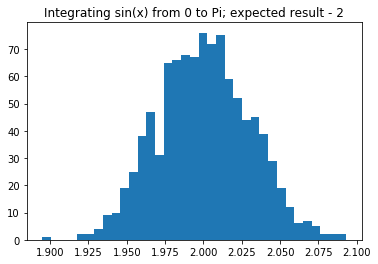

In [198]:
sin_integration()

Great! Peaking at 2, just like we expected. Obviously if we were to make a bigger sample (aka increase the random number ammount up there) we would get an even better result - it will be more clear that the peak is at 2. Now, I just got my laptop back from the repairman, so I really dont wanna do that, but you can try that at your own risk by changing the number in brackets (the default is 1000). Update - I just reworked the code (again) making it a proper function, gotta harvest those bonus points :D

### Using the Monte Carlo Method to estimate Pi
Now, the moment we've all been waiting for (and ofcourse, by "we", I only mean myself)! The Monte Carlo method is a very powerful one indeed - if you've been following along, by now you know that it can be used in various magnificient projects that help humanity grow a tremendous ammount, such as simulating fluids, designing heat shields and aerodynamic forms, molecular modeling, signal processing and so on. So, what we're going to do? We're obviously going to estimate Pi - the most important of them all (oh god). What really inspired me is [this page](https://curiosity-driven.org/pi-approximation). Now, let's go through some theory behind this. We're essentially going to be spamming a ton of dots at random locations at a specific figure of a circle enclosed in a square and trying to find a corelation between those inside the circle and those outside of it. Now, what we know is that the circle's area is equal to $ \pi r^2 $ and the square's side is equal to the diameter of the circle, aka $ 2*r $ - which makes the square's area $ 4r^2 $. Now let's divide those!
$$ \frac{\pi r^2}{4r^2}=\frac{\pi}{4} $$
Now we're going to take the points inside the circle and divide them by the total ammount of points (the points in the square). Due to our formula being $ \frac{\pi}{4} $ , we're going to multiply that by 4 in order to estimate pi.

In [199]:
inside = 0
total = 10000

x_inside = []
y_inside = []
x_outside = []
y_outside = []

for i in range(total):
    x = random.random()
    y = random.random()
    if x**2 + y**2 <= 1:
        inside += 1
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)
        
pi = 4 * inside / total
print("Pi =", inside, "/", total)
print(pi)

Pi = 7852 / 10000
3.1408


Sounds about right! Now let's add a plot (so we can separate this project from GoT's final season) and make this into a proper function, which is going to conclude my work! Thanks for reading (or scrolling through, I don't mind that at all) my project!

In [200]:
def montecarlo_pi_estimation(total = 5000) :
    
    inside = 0 
    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    for i in range(total):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            inside += 1
            x_inside.append(x)
            y_inside.append(y)
        else:
            x_outside.append(x)
            y_outside.append(y)

    pi = 4 * inside / total
    print("Pi =", inside, "/", total)
    print("Pi =",pi)

    plt.scatter(x_inside, y_inside, color='green')
    plt.scatter(x_outside, y_outside, color ='gray')
    plt.gca().set_aspect('equal')
    plt.show()

Pi = 3893 / 5000
Pi = 3.1144


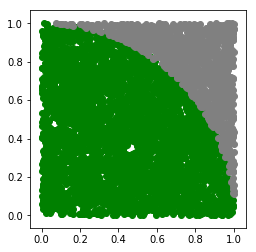

Pi = 39238 / 50000
3.13904


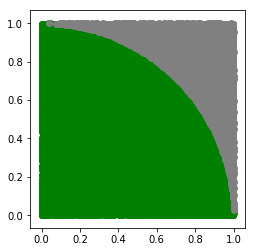

In [201]:
montecarlo_pi_estimation()
monte_carlo_pi_estimation(50000)

#### References:
**The almighty Wikipedia :**

https://en.wikipedia.org/wiki/Simulation

https://en.wikipedia.org/wiki/History_of_Go

https://en.wikipedia.org/wiki/Kriegsspiel

https://en.wikipedia.org/wiki/Verification_and_validation_of_computer_simulation_models

https://en.wikipedia.org/wiki/Emulator

https://en.wikipedia.org/wiki/Human-in-the-loop
    
https://en.wikipedia.org/wiki/Probability_distribution

https://en.wikipedia.org/wiki/Deterministic_system

https://en.wikipedia.org/wiki/Mathematical_optimization

https://en.wikipedia.org/wiki/Numerical_integration

**Stackexchange :**

https://stats.stackexchange.com/questions/22293/explanation-of-statistical-simulation

**Youtube :**

https://www.youtube.com/watch?v=08UVHYESkeQ

https://www.youtube.com/watch?v=OgO1gpXSUzU&t=1806s

**Other :**

https://curiosity-driven.org/pi-approximation